In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress
from HandyFunctions import calc_scale_height, convert_rprs_to_rpJ, calc_scale_height_error

In [36]:
## WASP-96 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw96= np.load('output_arrays/synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw96, tAw96, terrAw96 = resAw96['fasyms'], resAw96['tdiff_seconds'], resAw96['tdiff_err_seconds']
resBw96 = np.load('output_arrays/synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw96, tBw96, terrBw96 = resBw96['fasyms'], resBw96['tdiff_seconds'], resBw96['tdiff_err_seconds']
resCw96 = np.load('output_arrays/synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw96, tCw96, terrCw96 = resCw96['fasyms'], resCw96['tdiff_seconds'], resCw96['tdiff_err_seconds']
fw96, tw96, terrw96 = np.concatenate((fAw96, fBw96, fCw96)), np.concatenate((tAw96, tBw96, tCw96)), np.concatenate((terrAw96, terrBw96, terrCw96))

## WASP-107 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw107= np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw107, tAw107, terrAw107 = resAw107['fasyms'], resAw107['tdiff_seconds'], resAw107['tdiff_err_seconds']
resBw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw107, tBw107, terrBw107 = resBw107['fasyms'], resBw107['tdiff_seconds'], resBw107['tdiff_err_seconds']
resCw107 = np.load('output_arrays/wasp107b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw107, tCw107, terrCw107 = resCw107['fasyms'], resCw107['tdiff_seconds'], resCw107['tdiff_err_seconds']
fw107, tw107, terrw107 = np.concatenate((fAw107, fBw107, fCw107)), np.concatenate((tAw107, tBw107, tCw107)),np.concatenate((terrAw107, terrBw107, terrCw107))

## GJ-1214 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAgj1214= np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAgj1214, tAgj1214, terrAgj1214 = resAgj1214['fasyms'], resAgj1214['tdiff_seconds'], resAgj1214['tdiff_err_seconds']
resBgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBgj1214, tBgj1214, terrBgj1214 = resBgj1214['fasyms'], resBgj1214['tdiff_seconds'], resBgj1214['tdiff_err_seconds']
resCgj1214 = np.load('output_arrays/gj1214b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCgj1214, tCgj1214, terrCgj1214 = resCgj1214['fasyms'], resCgj1214['tdiff_seconds'], resCgj1214['tdiff_err_seconds']
fgj1214, tgj1214, terrgj1214 = np.concatenate((fAgj1214, fBgj1214, fCgj1214)), np.concatenate((tAgj1214, tBgj1214, tCgj1214)), np.concatenate((terrAgj1214, terrBgj1214, terrCgj1214))
 
## WASP-39 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw39= np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw39, tAw39, terrAw39 = resAw39['fasyms'], resAw39['tdiff_seconds'], resAw39['tdiff_err_seconds']
resBw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw39, tBw39, terrBw39 = resBw39['fasyms'], resBw39['tdiff_seconds'], resBw39['tdiff_err_seconds']
resCw39 = np.load('output_arrays/wasp39b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw39, tCw39, terrCw39 = resCw39['fasyms'], resCw39['tdiff_seconds'], resCw39['tdiff_err_seconds']
fw39, tw39, terrw39 = np.concatenate((fAw39, fBw39, fCw39)), np.concatenate((tAw39, tBw39, tCw39)),np.concatenate((terrAw39, terrBw39, terrCw39))
    
## WASP-80 b results
# with PandExo cadence, 100 ppm scatter, ahead 1k
resAw80= np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenA_nircCadencekeyoutputs.npz')
fAw80, tAw80, terrAw80 = resAw80['fasyms'], resAw80['tdiff_seconds'], resAw80['tdiff_err_seconds']
resBw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenB_nircCadencekeyoutputs.npz')
fBw80, tBw80, terrBw80 = resBw80['fasyms'], resBw80['tdiff_seconds'], resBw80['tdiff_err_seconds']
resCw80 = np.load('output_arrays/wasp80b_synth_scatter100_ahead1000LDscenC_nircCadencekeyoutputs.npz')
fCw80, tCw80, terrCw80 = resCw80['fasyms'], resCw80['tdiff_seconds'], resCw80['tdiff_err_seconds']
fw80, tw80, terrw80 = np.concatenate((fAw80, fBw80, fCw80)), np.concatenate((tAw80, tBw80, tCw80)),np.concatenate((terrAw80, terrBw80, terrCw80))    
    
## Limb darkening coefficient cases
u1A, u2A= 0.1777 , 0.2952
u1B, u2B = 0.25, 0.45
u1C, u2C = 0.6, 0.2952

# Prop t0 uncertainties after 1,000 transits
propw96 = 1.235466*60. #[s]
propw107 = 4.341546*60.
propgj1214 = 0.209944*60.
propw39 = 4.979340*60.
propw80 = 0.279597*60.

## computing the scale heights as done in the simulations
M_w96, T_w96, RpRs_w96, Rs_w96, mu_w96 = 0.49, 1285., 0.1186, 1.15, 2.5
Merr_w96, Terr_w96, RpRserr_w96, Rserr_w96, muerr_w96 = 0.04, 40., 0.0017, 0.03, 0.25
Rp1_w96 = convert_rprs_to_rpJ(RpRs_w96, Rs_w96)
Rp1err_w96 = 9.73116*np.sqrt((Rs_w96**2 * RpRserr_w96**2) + (RpRs_w96**2 * Rserr_w96**2)) # 9.7... = Rsun -> Rjup conversion
H_w96 = calc_scale_height(T_w96, M_w96, Rp1_w96, mu_w96)
Herr_w96 = calc_scale_height_error(T_w96, M_w96, Rp1_w96, mu_w96, Terr_w96, Merr_w96, Rp1err_w96, muerr_w96)

M_w107, T_w107, RpRs_w107, Rs_w107, mu_w107 = 0.096, 770., 0.14434, 0.73, 2.5
Merr_w107, Terr_w107, RpRserr_w107, Rserr_w107, muerr_w107 = 0.005, 60., 0.00018, 0.15, 0.25
Rp1_w107 = convert_rprs_to_rpJ(RpRs_w107, Rs_w107)
Rp1err_w107 = 0.02 # using this one is inflated by Rs err -> 9.73116*np.sqrt((Rs_w107**2 * RpRserr_w107**2) + (RpRs_w107**2 * Rserr_w107**2))
H_w107 = calc_scale_height(T_w107, M_w107, Rp1_w107, mu_w107)
Herr_w107 = calc_scale_height_error(T_w107, M_w107, Rp1_w107, mu_w107, Terr_w107, Merr_w107, Rp1err_w107, muerr_w107)

M_gj1214, T_gj1214, RpRs_gj1214, Rs_gj1214, mu_gj1214 = 0.0257, 596., 0.1160, 0.215, 5.0
Merr_gj1214, Terr_gj1214, RpRserr_gj1214, Rserr_gj1214, muerr_gj1214 = 0.0014, 19., 0.0005, 0.008, 0.25
Rp1_gj1214 = convert_rprs_to_rpJ(RpRs_gj1214, Rs_gj1214)
Rp1err_gj1214 = 9.73116*np.sqrt((Rs_gj1214**2 * RpRserr_gj1214**2) + (RpRs_gj1214**2 * Rserr_gj1214**2))
H_gj1214 = calc_scale_height(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214)
Herr_gj1214 = calc_scale_height_error(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214, Terr_gj1214, Merr_gj1214, Rp1err_gj1214, muerr_gj1214)

M_w39, T_w39, RpRs_w39, Rs_w39, mu_w39 = 0.281, 1166., 0.1457, 0.928, 2.5
Merr_w39, Terr_w39, RpRserr_w39, Rserr_w39, muerr_w39 = 0.032, 14., 0.0015, 0.03, 0.25
Rp1_w39 = convert_rprs_to_rpJ(RpRs_w39, Rs_w39)
Rp1err_w39 = 9.73116*np.sqrt((Rs_w39**2 * RpRserr_w39**2) + (RpRs_w39**2 * Rserr_w39**2))
H_w39 = calc_scale_height(T_w39, M_w39, Rp1_w39, mu_w39)
Herr_w39 = calc_scale_height_error(T_w39, M_w39, Rp1_w39, mu_w39, Terr_w39, Merr_w39, Rp1err_w39, muerr_w39)

## checking WASP-80 b's scale height calculation
M_w80, T_w80, RpRs_w80, Rs_w80, mu_w80 = 0.538, 825., 0.17137, 0.605, 2.5 
Merr_w80, Terr_w80, RpRserr_w80, Rserr_w80, muerr_w80 = 0.035, 19., 0.00039, 0.048, 0.25
Rp1_w80 = convert_rprs_to_rpJ(RpRs_w80, Rs_w80)
Rp1err_w80 = 9.73116*np.sqrt((Rs_w80**2 * RpRserr_w80**2) + (RpRs_w80**2 * Rserr_w80**2))
H_w80 = calc_scale_height(T_w80, M_w80, Rp1_w80, mm=mu_w80)
Herr_w80 = calc_scale_height_error(T_w80, M_w80, Rp1_w80, mu_w80, Terr_w80, Merr_w80, Rp1err_w80, muerr_w80)

Teqs = np.array([T_gj1214, T_w80, T_w96, T_w39, T_w107])
radii1 = np.array([Rp1_gj1214, Rp1_w80, Rp1_w96, Rp1_w39, Rp1_w107])
masses = np.array([M_gj1214, M_w80, M_w96, M_w39, M_w107])
scaleheights = np.array([H_gj1214, H_w80, H_w96, H_w39, H_w107])
scaleheight_errs = np.array([Herr_gj1214, Herr_w80, Herr_w96, Herr_w39, Herr_w107])

labels = np.array(['GJ-1214 b', 'WASP-80 b', 'WASP-96 b', 'WASP-39 b', 'WASP-107 b'])

In [2]:
# np.savez(output_arr_name,
#         fasyms=fasym_arr,
#         tdiff_seconds=t0_diff_seconds_arr, tdiff_err_seconds=t0_diff_seconds_err_arr,
#         chi2red_homog=chi2red_homog_arr, chi2red_asym=chi2red_asym_arr)

## Looking at y=t, x=R

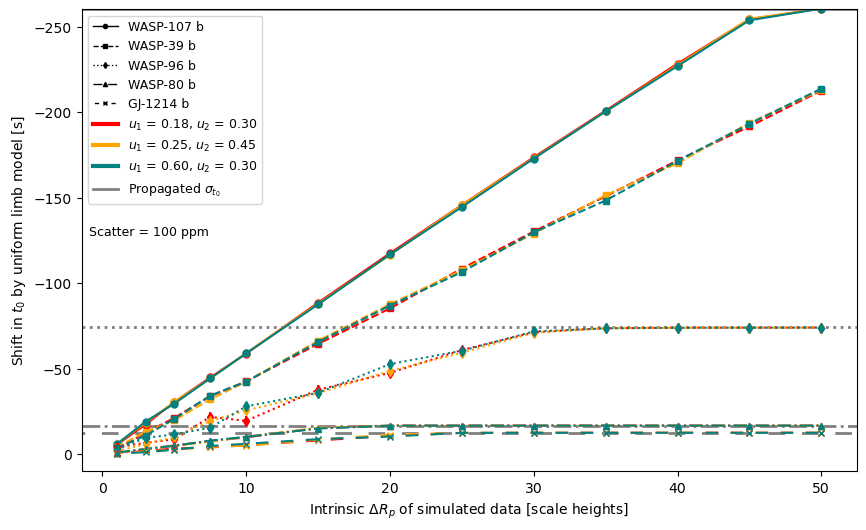

In [17]:
## Plotting the full f_asym vs. t diff data
fig, ax = plt.subplots(figsize=(10,6))

# W-107 b
ax.axhline(-propw107, ls='solid', c='black', lw=2, alpha=0.5)
ax.errorbar(fAw107, tAw107, terrAw107, ls='solid', marker='o', ms=5, c='red')
ax.errorbar(fBw107, tBw107, terrBw107, ls='solid', marker='o', ms=5, c='orange')
ax.errorbar(fCw107, tCw107, terrCw107, ls='solid', marker='o', ms=5, c='teal')
# W-39 b
ax.axhline(-propw39, ls='--', c='black', lw=2, alpha=0.5)
ax.errorbar(fAw39, tAw39, terrAw39, ls='--', marker='s', ms=5, c='red')
ax.errorbar(fBw39, tBw39, terrBw39, ls='--', marker='s', ms=5, c='orange')
ax.errorbar(fCw39, tCw39, terrCw39, ls='--', marker='s', ms=5, c='teal')
# W-96 b
ax.axhline(-propw96, ls='dotted', c='black', lw=2, alpha=0.5)
ax.errorbar(fAw96, tAw96, terrAw96, ls='dotted', marker='d', ms=5, c='red')
ax.errorbar(fBw96, tBw96, terrBw96, ls='dotted', marker='d', ms=5, c='orange')
ax.errorbar(fCw96, tCw96, terrCw96, ls='dotted', marker='d', ms=5, c='teal')
# W-80 b
ax.axhline(-propw80, ls='dashdot', c='black', lw=2, alpha=0.5)
ax.errorbar(fAw80, tAw80, terrAw80, ls='dashdot', marker='^', ms=5, c='red')
ax.errorbar(fBw80, tBw80, terrBw80, ls='dashdot', marker='^', ms=5, c='orange')
ax.errorbar(fCw80, tCw80, terrCw80, ls='dashdot', marker='^', ms=5, c='teal')
# gj-1214 b
ax.axhline(-propgj1214, ls=(5,(6,6)), c='black', lw=2, alpha=0.5)
ax.errorbar(fAgj1214, tAgj1214, terrAgj1214, ls=(5,(6,6)), marker='x', ms=5, c='red')
ax.errorbar(fBgj1214, tBgj1214, terrBgj1214, ls=(5,(6,6)), marker='x', ms=5, c='orange')
ax.errorbar(fCgj1214, tCgj1214, terrCgj1214, ls=(5,(6,6)), marker='x', ms=5, c='teal')

custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid'), Line2D([0],[0], c='black', lw=2, ls='solid', alpha=0.5)
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C), 'Propagated $\sigma_{t_0}$']
ax.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)
ax.set(ylim=(10, -260))
#ax.set(xlim=(0, 25))
ax.set(xlabel=r'Intrinsic $\Delta R_p$ of simulated data [scale heights]', ylabel=r'Shift in $t_0$ by uniform limb model [s]')
ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=.5, fontsize=9)

plt.show()

- Different LDC lines, for a given planet, are nearly identical
- Each planet has a different family of lines, primarily differentiated by their slopes
- Each relationship is linear up until y = the propagated uncertainty after which it flattens. This is because the propagated uncertainty limits the amount you can shift (via Bayesian prior enforcement). 
- Given a specific uncertainty (i.e. a y-value), you generally cannot resolve asymmetries (i.e. x-values) smaller than where your planet's line meets that y-value. 

In [34]:
# Fitting each planet's combined line family
def line_fit(xdata, ydata):
    fit = linregress(xdata, ydata)
    return fit.slope, fit.intercept, fit.stderr, fit.intercept_stderr

def check_fit(xdata, ydata, yerrs, prop=-99, title=-99):
    fitparams = line_fit(xdata, ydata)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.errorbar(xdata, ydata, yerrs, ls='--', marker='o', c='black', ms=7)
    x_plot = np.linspace(min(xdata), max(xdata), 15)
    y_plot = fitparams[0]*x_plot + fitparams[1]
    ax.plot(x_plot, y_plot, c='red', zorder=5, lw=2)
    ax.text(0.65, 0.75, 'Slope = %f +/- %f'%(fitparams[0], fitparams[2]), transform=ax.transAxes)
    ax.text(0.65, 0.65, 'Intcpt = %f +/- %f'%(fitparams[1], fitparams[3]), transform=ax.transAxes)
    
    if prop != -99:
        ax.axhline(-prop, c='black', ls='dotted', alpha=0.3)
    if title != -99:
        plt.title(title)
    
    plt.show()

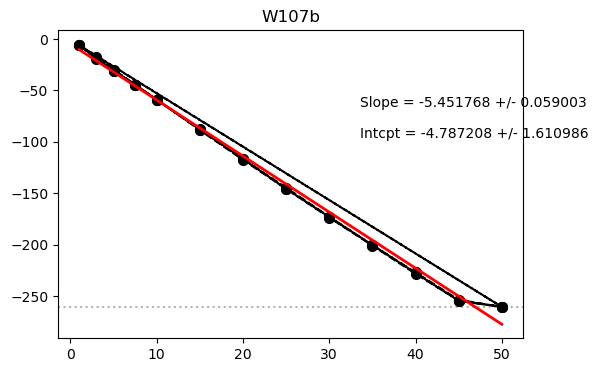

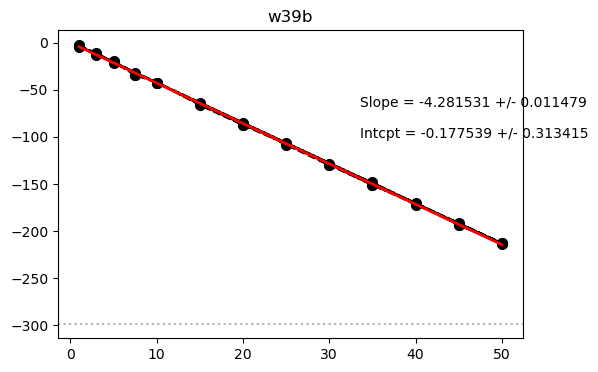

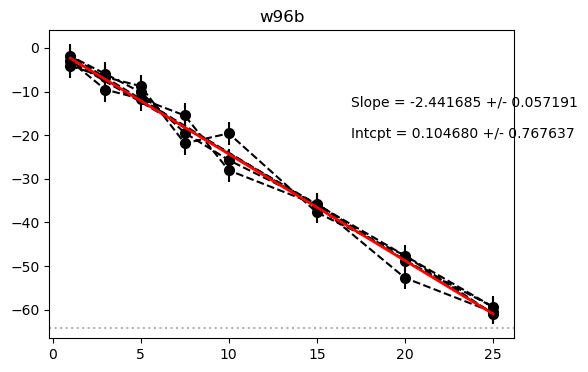

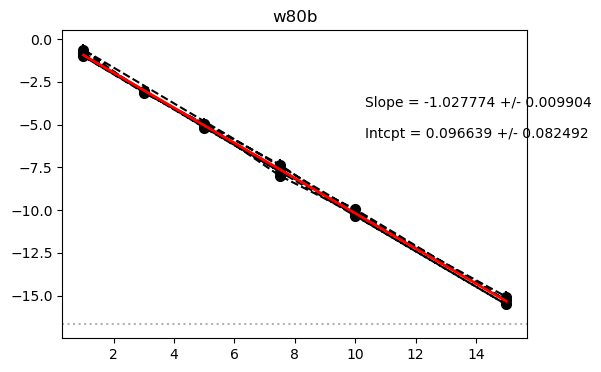

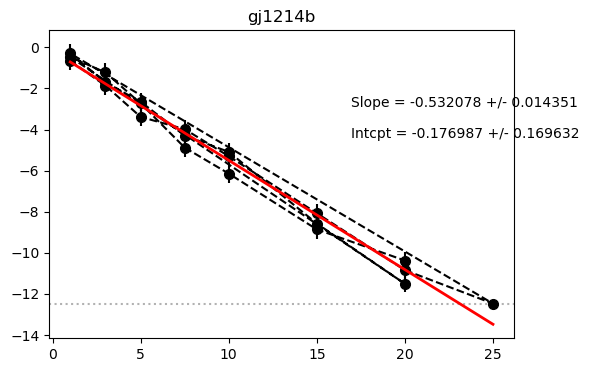

In [42]:
# Fitting each planet's combined line family
idxs1_w107 = np.where(abs(tw107) <= propw107)
slope1_w107, intcpt1_w107, slope1err_w107, intcpt1err_w107 = line_fit(fw107[idxs1_w107], tw107[idxs1_w107])
check_fit(fw107[idxs1_w107], tw107[idxs1_w107], terrw107[idxs1_w107], propw107, 'W107b')

idxs1_w39 = np.where(abs(tw39) <= propw39)
slope1_w39, intcpt1_w39, slope1err_w39, intcpt1err_w39 = line_fit(fw39[idxs1_w39], tw39[idxs1_w39])
check_fit(fw39[idxs1_w39], tw39[idxs1_w39], terrw39[idxs1_w39], propw39, 'w39b')

idxs1_w96 = np.where(abs(tw96) <= propw96-10)
slope1_w96, intcpt1_w96, slope1err_w96, intcpt1err_w96 = line_fit(fw96[idxs1_w96], tw96[idxs1_w96])
check_fit(fw96[idxs1_w96], tw96[idxs1_w96], terrw96[idxs1_w96], propw96-10, 'w96b')

idxs1_w80 = np.where(abs(tw80) <= propw80-0.1)
slope1_w80, intcpt1_w80, slope1err_w80, intcpt1err_w80 = line_fit(fw80[idxs1_w80], tw80[idxs1_w80])
check_fit(fw80[idxs1_w80], tw80[idxs1_w80], terrw80[idxs1_w80], propw80-0.1, 'w80b')

idxs1_gj1214 = np.where(abs(tgj1214) <= propgj1214-0.1)
slope1_gj1214, intcpt1_gj1214, slope1err_gj1214, intcpt1err_gj1214 = line_fit(fgj1214[idxs1_gj1214], tgj1214[idxs1_gj1214])
check_fit(fgj1214[idxs1_gj1214], tgj1214[idxs1_gj1214], terrgj1214[idxs1_gj1214], propgj1214-0.1, 'gj1214b')

slopes1 = np.array([slope1_gj1214, slope1_w80, slope1_w96, slope1_w39, slope1_w107])
slopes1err = np.array([slope1err_gj1214, slope1err_w80, slope1err_w96, slope1err_w39, slope1err_w107])

slopeH1, intcptH1, slopeerrH1, intcpterrH1 = line_fit(scaleheights, slopes1)

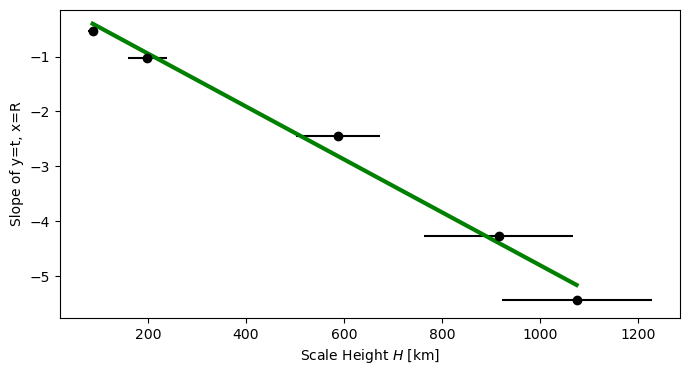

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
ax.errorbar(scaleheights, slopes1, xerr=scaleheight_errs, yerr=slopes1err, marker='o', 
           ls='None', c='black')
x_plotfit = np.linspace(min(scaleheights), max(scaleheights), 20)
y_plotfit = slopeH1*x_plotfit + intcptH1
ax.plot(x_plotfit, y_plotfit, c='green', lw=3)
ax.set(xlabel='Scale Height $H$ [km]', ylabel='Slope of y=t, x=R')
plt.show()

In [5]:
# ## plotting the different LD scenarios
# fig, ax = plt.subplots(figsize=(8,5))

# ## WASP-107 b:
# ax.errorbar(fasymAw107, abs(tdiffAw107_s), tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
# ax.errorbar(fasymBw107, abs(tdiffBw107_s), tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
# ax.errorbar(fasymCw107, abs(tdiffCw107_s), tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')

# ## wasp 39 b:
# ax.errorbar(fasymAw39, abs(tdiffAw39_s), tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
# ax.errorbar(fasymBw39, abs(tdiffBw39_s), tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
# ax.errorbar(fasymCw39, abs(tdiffCw39_s), tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')

# ## WASP-96 b:
# ax.errorbar(fasymA, abs(tdiffA_s), tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# ax.errorbar(fasymB, abs(tdiffB_s), tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# ax.errorbar(fasymC, abs(tdiffC_s), tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

# ## wasp 80 b:
# ax.errorbar(fasymAw80, abs(tdiffAw80_s), tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
# ax.errorbar(fasymBw80, abs(tdiffBw80_s), tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
# ax.errorbar(fasymCw80, abs(tdiffCw80_s), tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')

# ## GJ 1214 b:
# ax.errorbar(fasymAgj1214, abs(tdiffAgj1214_s), tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
# ax.errorbar(fasymBgj1214, abs(tdiffBgj1214_s), tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
# ax.errorbar(fasymCgj1214, abs(tdiffCgj1214_s), tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')


# custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
#                        Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
#                        Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
#                        Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
#                        Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
#                        Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
#                        Line2D([0],[0], color='teal', lw=3, ls='solid')
#                       ]
# custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
#                        '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
# ax.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)

# ax.set(ylim=(0., 80.))
# #ax.set(ylim=(-80., 0.))
# ax.set(xlim=(0, 25))
# ax.set(xlabel=r'Intrinsic $\Delta R_p$ of simulated data [scale heights]', ylabel=r'Abs. Val Shift in $t_0$ by uniform limb model [s]')

# ax.legend(custom_legend_lines, custom_legend_labels, loc='upper left', markerscale=.5, fontsize=9)
# plt.savefig('analysis_figures/t0Rp_plot_diffcadencescatter100.png', dpi=350, bbox_inches='tight')
# plt.show()

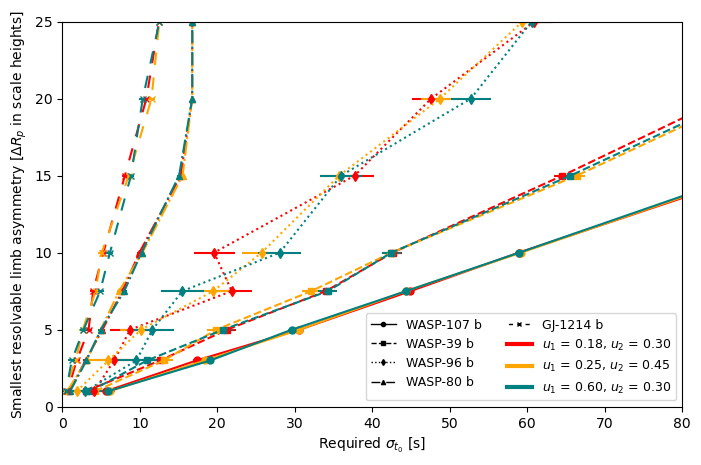

In [4]:
## plotting the different LD scenarios
fig, ax = plt.subplots(figsize=(8,5))

## WASP-107 b:
# LD scenario A 
ax.errorbar(abs(tdiffAw107_s), fasymAw107, xerr=tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
# LD scenario B
ax.errorbar(abs(tdiffBw107_s), fasymBw107, xerr=tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
# LD scenario C
ax.errorbar(abs(tdiffCw107_s), fasymCw107, xerr=tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')

## wasp 39 b:
# LD scenario A 
ax.errorbar(abs(tdiffAw39_s), fasymAw39, xerr=tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
# LD scenario B
ax.errorbar(abs(tdiffBw39_s), fasymBw39, xerr=tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
# LD scenario C
ax.errorbar(abs(tdiffCw39_s), fasymCw39, xerr=tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')

## WASP-96 b:
# LD scenario A 
ax.errorbar(abs(tdiffA_s), fasymA, xerr=tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax.errorbar(abs(tdiffB_s), fasymB, xerr=tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax.errorbar(abs(tdiffC_s), fasymC, xerr=tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

## wasp 80 b:
# LD scenario A 
ax.errorbar(abs(tdiffAw80_s), fasymAw80, xerr=tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
# LD scenario B
ax.errorbar(abs(tdiffBw80_s), fasymBw80, xerr=tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
# LD scenario C
ax.errorbar(abs(tdiffCw80_s), fasymCw80, xerr=tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')

## GJ 1214 b:
# LD scenario A 
ax.errorbar(abs(tdiffAgj1214_s), fasymAgj1214, xerr=tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
# LD scenario B
ax.errorbar(abs(tdiffBgj1214_s), fasymBgj1214, xerr=tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
# LD scenario C
ax.errorbar(abs(tdiffCgj1214_s), fasymCgj1214, xerr=tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')


custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
#ax.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax.transAxes)

ax.set(xlim=(0., 80.))
#ax.set(ylim=(-80., 0.))
ax.set(ylim=(0, 25))
ax.set(ylabel=r'Smallest resolvable limb asymmetry [$\Delta R_p$ in scale heights]', 
       xlabel=r'Required $\sigma_{t_0}$ [s]')

ax.legend(custom_legend_lines, custom_legend_labels, loc='lower right', ncol=2, markerscale=.5, fontsize=9)
plt.savefig('analysis_figures/t0Rp_plot_friendly_diffcadencescatter100.png', dpi=350, bbox_inches='tight')
plt.show()

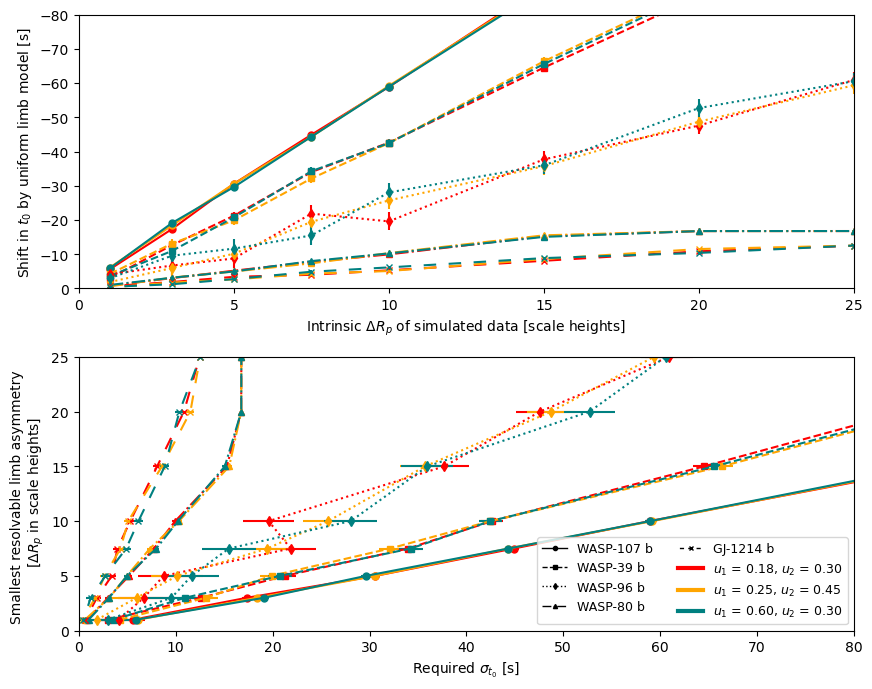

In [5]:
## combining the above into one plot
fig, ax = plt.subplots(figsize=(10,8), nrows=2)
plt.subplots_adjust(hspace=0.25)
ax0, ax1 = ax[0], ax[1]

## WASP-107 b:
# LD scenario A 
ax0.errorbar(fasymAw107, tdiffAw107_s, tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
# LD scenario B
ax0.errorbar(fasymBw107, tdiffBw107_s, tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
# LD scenario C
ax0.errorbar(fasymCw107, tdiffCw107_s, tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')

## wasp 39 b:
# LD scenario A 
ax0.errorbar(fasymAw39, tdiffAw39_s, tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
# LD scenario B
ax0.errorbar(fasymBw39, tdiffBw39_s, tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
# LD scenario C
ax0.errorbar(fasymCw39, tdiffCw39_s, tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')

## WASP-96 b:
# LD scenario A 
ax0.errorbar(fasymA, tdiffA_s, tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax0.errorbar(fasymB, tdiffB_s, tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax0.errorbar(fasymC, tdiffC_s, tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

## wasp 80 b:
# LD scenario A 
ax0.errorbar(fasymAw80, tdiffAw80_s, tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
# LD scenario B
ax0.errorbar(fasymBw80, tdiffBw80_s, tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
# LD scenario C
ax0.errorbar(fasymCw80, tdiffCw80_s, tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')

## GJ 1214 b:
# LD scenario A 
ax0.errorbar(fasymAgj1214, tdiffAgj1214_s, tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
# LD scenario B
ax0.errorbar(fasymBgj1214, tdiffBgj1214_s, tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
# LD scenario C
ax0.errorbar(fasymCgj1214, tdiffCgj1214_s, tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')


custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
#ax0.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax0.transAxes)
ax0.set(ylim=(0., -80.))
ax0.set(xlim=(0, 25))
ax0.set(xlabel=r'Intrinsic $\Delta R_p$ of simulated data [scale heights]', ylabel=r'Shift in $t_0$ by uniform limb model [s]')

################3

## WASP-107 b:
# LD scenario A 
ax1.errorbar(abs(tdiffAw107_s), fasymAw107, xerr=tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
# LD scenario B
ax1.errorbar(abs(tdiffBw107_s), fasymBw107, xerr=tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
# LD scenario C
ax1.errorbar(abs(tdiffCw107_s), fasymCw107, xerr=tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')

## wasp 39 b:
# LD scenario A 
ax1.errorbar(abs(tdiffAw39_s), fasymAw39, xerr=tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
# LD scenario B
ax1.errorbar(abs(tdiffBw39_s), fasymBw39, xerr=tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
# LD scenario C
ax1.errorbar(abs(tdiffCw39_s), fasymCw39, xerr=tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')

## WASP-96 b:
# LD scenario A 
ax1.errorbar(abs(tdiffA_s), fasymA, xerr=tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
# LD scenario B
ax1.errorbar(abs(tdiffB_s), fasymB, xerr=tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
# LD scenario C
ax1.errorbar(abs(tdiffC_s), fasymC, xerr=tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))

## wasp 80 b:
# LD scenario A 
ax1.errorbar(abs(tdiffAw80_s), fasymAw80, xerr=tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
# LD scenario B
ax1.errorbar(abs(tdiffBw80_s), fasymBw80, xerr=tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
# LD scenario C
ax1.errorbar(abs(tdiffCw80_s), fasymCw80, xerr=tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')

## GJ 1214 b:
# LD scenario A 
ax1.errorbar(abs(tdiffAgj1214_s), fasymAgj1214, xerr=tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
# LD scenario B
ax1.errorbar(abs(tdiffBgj1214_s), fasymBgj1214, xerr=tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
# LD scenario C
ax1.errorbar(abs(tdiffCgj1214_s), fasymCgj1214, xerr=tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')


custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
#ax1.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax1.transAxes)

ax1.set(xlim=(0., 80.))
#ax1.set(ylim=(-80., 0.))
ax1.set(ylim=(0, 25))
ax1.set(ylabel='Smallest resolvable limb asymmetry \n [$\Delta R_p$ in scale heights]', 
       xlabel=r'Required $\sigma_{t_0}$ [s]')

ax1.legend(custom_legend_lines, custom_legend_labels, loc='lower right', ncol=2, markerscale=.5, fontsize=9)

plt.savefig('analysis_figures/combined_tRplot.png', dpi=350, bbox_inches='tight')
plt.show()

For each x (i.e. each intrinsic limb asymmetry size), the y-value is how much the uniform limb model's transit time needed to be shifted in order to mimic the asymmetric data as best as possible. This does not necessarily mean that the corresponding shift effectively mimicked the asymmetry, given the data's scatter. Nevertheless, each line provides a rough guide for planning observations. That is, in order to discern a given asymmetry size (x-value) in light of the asymmetry-timing degeneracy, you need to know the current transit time (and enforce strong priors!) to within a range equal to the y-value. 

Shallower slope = harder to detect asymmetry because you need very tight timing precision to detect even small asymmetries.

In [6]:
# Fitting these lines (x = asym, y = time) with a linear function
fasym_w96combined = np.concatenate((fasymA, fasymB, fasymC))
tdiff_s_w96combined = np.concatenate((tdiffA_s, tdiffB_s, tdiffC_s))
linfit_w96 = linregress(fasym_w96combined, tdiff_s_w96combined)
slope_w96, slope_err_w96 = linfit_w96.slope, linfit_w96.stderr
intcpt_w96, intcpt_err_w96 = linfit_w96.intercept, linfit_w96.intercept_stderr

fasym_w107combined = np.concatenate((fasymAw107, fasymBw107, fasymCw107))
tdiff_s_w107combined = np.concatenate((tdiffAw107_s, tdiffBw107_s, tdiffCw107_s))
linfit_w107 = linregress(fasym_w107combined, tdiff_s_w107combined)
slope_w107, slope_err_w107 = linfit_w107.slope, linfit_w107.stderr
intcpt_w107, intcpt_err_w107 = linfit_w107.intercept, linfit_w107.intercept_stderr

fasym_gj1214combined = np.concatenate((fasymAgj1214, fasymBgj1214, fasymCgj1214))
tdiff_s_gj1214combined = np.concatenate((tdiffAgj1214_s, tdiffBgj1214_s, tdiffCgj1214_s))
linfit_gj1214 = linregress(fasym_gj1214combined, tdiff_s_gj1214combined)
slope_gj1214, slope_err_gj1214 = linfit_gj1214.slope, linfit_gj1214.stderr
intcpt_gj1214, intcpt_err_gj1214 = linfit_gj1214.intercept, linfit_gj1214.intercept_stderr

fasym_w39combined = np.concatenate((fasymAw39, fasymBw39, fasymCw39))
tdiff_s_w39combined = np.concatenate((tdiffAw39_s, tdiffBw39_s, tdiffCw39_s))
linfit_w39 = linregress(fasym_w39combined, tdiff_s_w39combined)
slope_w39, slope_err_w39 = linfit_w39.slope, linfit_w39.stderr
intcpt_w39, intcpt_err_w39 = linfit_w39.intercept, linfit_w39.intercept_stderr

fasym_w80combined = np.concatenate((fasymAw80, fasymBw80, fasymCw80))
tdiff_s_w80combined = np.concatenate((tdiffAw80_s, tdiffBw80_s, tdiffCw80_s))
linfit_w80 = linregress(fasym_w80combined, tdiff_s_w80combined)
slope_w80, slope_err_w80 = linfit_w80.slope, linfit_w80.stderr
intcpt_w80, intcpt_err_w80 = linfit_w80.intercept, linfit_w80.intercept_stderr

slopes = np.array([slope_gj1214, slope_w80, slope_w96, slope_w39, slope_w107])
slope_errs = np.array([slope_err_gj1214, slope_err_w80, slope_err_w96, slope_err_w39, slope_err_w107])

intcpts = np.array([intcpt_gj1214, intcpt_w80, intcpt_w96, intcpt_w39, intcpt_w107])
intcpt_errs = np.array([intcpt_err_gj1214, intcpt_err_w80, intcpt_err_w96, intcpt_err_w39, intcpt_err_w107])

In [124]:
# Fitting the other lines (x = time, y = asym) with a linear function
idx2_w96 = np.where(abs(tdiff_s_w96combined) < 72.)
linfit2_w96 = linregress(abs(tdiff_s_w96combined)[idx2_w96], fasym_w96combined[idx2_w96])
slope2_w96, slope2_err_w96 = linfit2_w96.slope, linfit2_w96.stderr
intcpt2_w96, intcpt2_err_w96 = linfit2_w96.intercept, linfit2_w96.intercept_stderr

linfit2_w107 = linregress(abs(tdiff_s_w107combined), fasym_w107combined)
slope2_w107, slope2_err_w107 = linfit2_w107.slope, linfit2_w107.stderr
intcpt2_w107, intcpt2_err_w107 = linfit2_w107.intercept, linfit2_w107.intercept_stderr

idx2_gj1214 = np.where(abs(tdiff_s_gj1214combined) < 10.)
linfit2_gj1214 = linregress(abs(tdiff_s_gj1214combined)[idx2_gj1214], fasym_gj1214combined[idx2_gj1214])
slope2_gj1214, slope2_err_gj1214 = linfit2_gj1214.slope, linfit2_gj1214.stderr
intcpt2_gj1214, intcpt2_err_gj1214 = linfit2_gj1214.intercept, linfit2_gj1214.intercept_stderr

idx2_w39 = np.where(abs(tdiff_s_w39combined) < 200.)
linfit2_w39 = linregress(abs(tdiff_s_w39combined)[idx2_w39], fasym_w39combined[idx2_w39])
slope2_w39, slope2_err_w39 = linfit2_w39.slope, linfit2_w39.stderr
intcpt2_w39, intcpt2_err_w39 = linfit2_w39.intercept, linfit2_w39.intercept_stderr

idx2_w80 = np.where(abs(tdiff_s_w80combined) < 14.)
linfit2_w80 = linregress(abs(tdiff_s_w80combined)[idx2_w80], fasym_w80combined[idx2_w80])
slope2_w80, slope2_err_w80 = linfit2_w80.slope, linfit2_w80.stderr
intcpt2_w80, intcpt2_err_w80 = linfit2_w80.intercept, linfit2_w80.intercept_stderr

slopes2 = np.array([slope2_gj1214, slope2_w80, slope2_w96, slope2_w39, slope2_w107])
slope2_errs = np.array([slope2_err_gj1214, slope2_err_w80, slope2_err_w96, slope2_err_w39, slope2_err_w107])

intcpts2 = np.array([intcpt2_gj1214, intcpt2_w80, intcpt2_w96, intcpt2_w39, intcpt2_w107])
intcpt2_errs = np.array([intcpt2_err_gj1214, intcpt2_err_w80, intcpt2_err_w96, intcpt2_err_w39, intcpt2_err_w107])

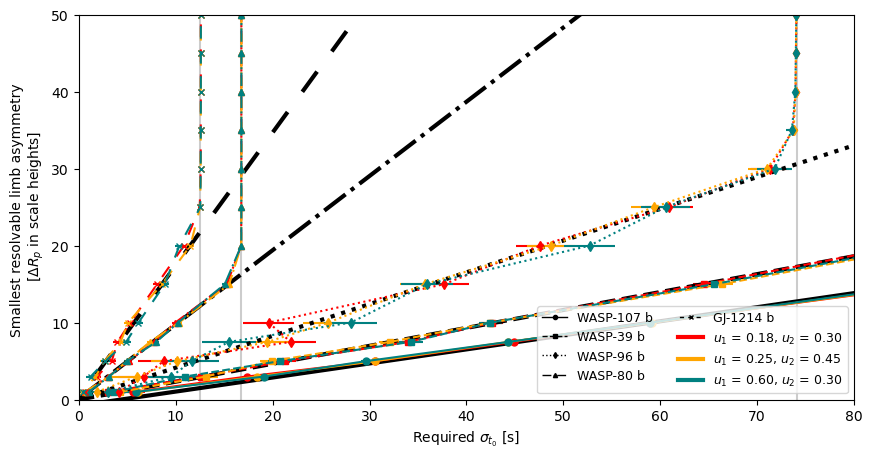

In [125]:
fig, ax1 = plt.subplots(figsize=(10,5))

x_bflines = np.linspace(0., 90., 15)
## WASP-107 b:
ax1.errorbar(abs(tdiffAw107_s), fasymAw107, xerr=tdifferrAw107_s, ls='solid', marker='o', ms=5, c='red')
ax1.errorbar(abs(tdiffBw107_s), fasymBw107, xerr=tdifferrBw107_s, ls='solid', marker='o', ms=5, c='orange')
ax1.errorbar(abs(tdiffCw107_s), fasymCw107, xerr=tdifferrCw107_s, ls='solid', marker='o', ms=5, c='teal')
ax1.plot(x_bflines, slope2_w107*x_bflines + intcpt2_w107, ls='solid', c='black', lw=3)

## wasp 39 b:
ax1.errorbar(abs(tdiffAw39_s), fasymAw39, xerr=tdifferrAw39_s, ls='--', marker='s', ms=5, c='red')
ax1.errorbar(abs(tdiffBw39_s), fasymBw39, xerr=tdifferrBw39_s, ls='--', marker='s', ms=5, c='orange')
ax1.errorbar(abs(tdiffCw39_s), fasymCw39, xerr=tdifferrCw39_s, ls='--', marker='s', ms=5, c='teal')
ax1.plot(x_bflines, slope2_w39*x_bflines + intcpt2_w39, ls='--', c='black', lw=3)

## WASP-96 b:
ax1.errorbar(abs(tdiffA_s), fasymA, xerr=tdifferrA_s, ls='dotted', marker='d', ms=5, c='red', label='scen. A: u1=%.2f u2=%.2f'%(u1A, u2A))
ax1.errorbar(abs(tdiffB_s), fasymB, xerr=tdifferrB_s, ls='dotted', marker='d', ms=5, c='orange', label='scen. B: u1=%.2f u2=%.2f'%(u1B, u2B))
ax1.errorbar(abs(tdiffC_s), fasymC, xerr=tdifferrC_s, ls='dotted', marker='d', ms=5, c='teal', label='scen. C: u1=%.2f u2=%.2f'%(u1C, u2C))
ax1.plot(x_bflines, slope2_w96*x_bflines + intcpt2_w96, ls='dotted', c='black', lw=3)

## wasp 80 b:
ax1.errorbar(abs(tdiffAw80_s), fasymAw80, xerr=tdifferrAw80_s, ls='dashdot', marker='^', ms=5, c='red')
ax1.errorbar(abs(tdiffBw80_s), fasymBw80, xerr=tdifferrBw80_s, ls='dashdot', marker='^', ms=5, c='orange')
ax1.errorbar(abs(tdiffCw80_s), fasymCw80, xerr=tdifferrCw80_s, ls='dashdot', marker='^', ms=5, c='teal')
ax1.plot(x_bflines, slope2_w80*x_bflines + intcpt2_w80, ls='dashdot', c='black', lw=3)

## GJ 1214 b:
ax1.errorbar(abs(tdiffAgj1214_s), fasymAgj1214, xerr=tdifferrAgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='red')
ax1.errorbar(abs(tdiffBgj1214_s), fasymBgj1214, xerr=tdifferrBgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='orange')
ax1.errorbar(abs(tdiffCgj1214_s), fasymCgj1214, xerr=tdifferrCgj1214_s, ls=(5, (6,6)), marker='x', ms=5, c='teal')
ax1.plot(x_bflines, slope2_gj1214*x_bflines + intcpt2_gj1214, ls=(5, (6,6)), c='black', lw=3)


custom_legend_lines = [Line2D([0], [0], color='black', marker='o', lw=1, ls='solid'), 
                       Line2D([0], [0], color='black', marker='s', lw=1, ls='--'),
                       Line2D([0], [0], color='black', marker='d', lw=1, ls='dotted'), 
                       Line2D([0], [0], color='black', marker='^', lw=1, ls='dashdot'),
                       Line2D([0], [0], color='black', marker='x', lw=1, ls=(5, (3,3))),
                       Line2D([0],[0], color='red', lw=3, ls='solid'), Line2D([0],[0], color='orange', lw=3, ls='solid'),
                       Line2D([0],[0], color='teal', lw=3, ls='solid')
                      ]
custom_legend_labels = ['WASP-107 b', 'WASP-39 b', 'WASP-96 b', 'WASP-80 b', 'GJ-1214 b','$u_1$ = %.2f, $u_2$ = %.2f'%(u1A, u2A), 
                       '$u_1$ = %.2f, $u_2$ = %.2f'%(u1B, u2B), '$u_1$ = %.2f, $u_2$ = %.2f'%(u1C, u2C)]
#ax1.text(0.01, 0.51, 'Scatter = 100 ppm', fontsize=9, transform=ax1.transAxes)

gj1214_prop = 0.209*60. # propagated t0 uncertainty (where it hit the bound)
w80_prop = 0.279*60.
w96_prop = 1.235*60.
ax1.axvline(gj1214_prop, alpha=0.2, c='black')
ax1.axvline(w80_prop, alpha=0.2, c='black')
ax1.axvline(w96_prop, alpha=0.2, c='black')

ax1.set(xlim=(0., 80.))
#ax1.set(ylim=(-80., 0.))
ax1.set(ylim=(0, 50))
ax1.set(ylabel='Smallest resolvable limb asymmetry \n [$\Delta R_p$ in scale heights]', 
       xlabel=r'Required $\sigma_{t_0}$ [s]')

ax1.legend(custom_legend_lines, custom_legend_labels, loc='lower right', ncol=2, markerscale=.5, fontsize=9)
plt.show()

In [126]:
## computing the scale heights as done in the simulations
M_w96, T_w96, RpRs_w96, Rs_w96, mu_w96 = 0.49, 1285., 0.1186, 1.15, 2.5
Merr_w96, Terr_w96, RpRserr_w96, Rserr_w96, muerr_w96 = 0.04, 40., 0.0017, 0.03, 0.25
Rp1_w96 = convert_rprs_to_rpJ(RpRs_w96, Rs_w96)
Rp1err_w96 = 9.73116*np.sqrt((Rs_w96**2 * RpRserr_w96**2) + (RpRs_w96**2 * Rserr_w96**2)) # 9.7... = Rsun -> Rjup conversion
H_w96 = calc_scale_height(T_w96, M_w96, Rp1_w96, mu_w96)
Herr_w96 = calc_scale_height_error(T_w96, M_w96, Rp1_w96, mu_w96, Terr_w96, Merr_w96, Rp1err_w96, muerr_w96)

M_w107, T_w107, RpRs_w107, Rs_w107, mu_w107 = 0.096, 770., 0.14434, 0.73, 2.5
Merr_w107, Terr_w107, RpRserr_w107, Rserr_w107, muerr_w107 = 0.005, 60., 0.00018, 0.15, 0.25
Rp1_w107 = convert_rprs_to_rpJ(RpRs_w107, Rs_w107)
Rp1err_w107 = 0.02 # using this one is inflated by Rs err -> 9.73116*np.sqrt((Rs_w107**2 * RpRserr_w107**2) + (RpRs_w107**2 * Rserr_w107**2))
H_w107 = calc_scale_height(T_w107, M_w107, Rp1_w107, mu_w107)
Herr_w107 = calc_scale_height_error(T_w107, M_w107, Rp1_w107, mu_w107, Terr_w107, Merr_w107, Rp1err_w107, muerr_w107)

M_gj1214, T_gj1214, RpRs_gj1214, Rs_gj1214, mu_gj1214 = 0.0257, 596., 0.1160, 0.215, 5.0
Merr_gj1214, Terr_gj1214, RpRserr_gj1214, Rserr_gj1214, muerr_gj1214 = 0.0014, 19., 0.0005, 0.008, 0.25
Rp1_gj1214 = convert_rprs_to_rpJ(RpRs_gj1214, Rs_gj1214)
Rp1err_gj1214 = 9.73116*np.sqrt((Rs_gj1214**2 * RpRserr_gj1214**2) + (RpRs_gj1214**2 * Rserr_gj1214**2))
H_gj1214 = calc_scale_height(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214)
Herr_gj1214 = calc_scale_height_error(T_gj1214, M_gj1214, Rp1_gj1214, mu_gj1214, Terr_gj1214, Merr_gj1214, Rp1err_gj1214, muerr_gj1214)

M_w39, T_w39, RpRs_w39, Rs_w39, mu_w39 = 0.281, 1166., 0.1457, 0.928, 2.5
Merr_w39, Terr_w39, RpRserr_w39, Rserr_w39, muerr_w39 = 0.032, 14., 0.0015, 0.03, 0.25
Rp1_w39 = convert_rprs_to_rpJ(RpRs_w39, Rs_w39)
Rp1err_w39 = 9.73116*np.sqrt((Rs_w39**2 * RpRserr_w39**2) + (RpRs_w39**2 * Rserr_w39**2))
H_w39 = calc_scale_height(T_w39, M_w39, Rp1_w39, mu_w39)
Herr_w39 = calc_scale_height_error(T_w39, M_w39, Rp1_w39, mu_w39, Terr_w39, Merr_w39, Rp1err_w39, muerr_w39)

## checking WASP-80 b's scale height calculation
M_w80, T_w80, RpRs_w80, Rs_w80, mu_w80 = 0.538, 825., 0.17137, 0.605, 2.5 
Merr_w80, Terr_w80, RpRserr_w80, Rserr_w80, muerr_w80 = 0.035, 19., 0.00039, 0.048, 0.25
Rp1_w80 = convert_rprs_to_rpJ(RpRs_w80, Rs_w80)
Rp1err_w80 = 9.73116*np.sqrt((Rs_w80**2 * RpRserr_w80**2) + (RpRs_w80**2 * Rserr_w80**2))
H_w80 = calc_scale_height(T_w80, M_w80, Rp1_w80, mm=mu_w80)
Herr_w80 = calc_scale_height_error(T_w80, M_w80, Rp1_w80, mu_w80, Terr_w80, Merr_w80, Rp1err_w80, muerr_w80)

Teqs = np.array([T_gj1214, T_w80, T_w96, T_w39, T_w107])
radii1 = np.array([Rp1_gj1214, Rp1_w80, Rp1_w96, Rp1_w39, Rp1_w107])
masses = np.array([M_gj1214, M_w80, M_w96, M_w39, M_w107])
scaleheights = np.array([H_gj1214, H_w80, H_w96, H_w39, H_w107])
scaleheight_errs = np.array([Herr_gj1214, Herr_w80, Herr_w96, Herr_w39, Herr_w107])

labels = np.array(['GJ-1214 b', 'WASP-80 b', 'WASP-96 b', 'WASP-39 b', 'WASP-107 b'])

In [127]:
for i, planet in enumerate(labels):
    print(planet)
    print('H = %.1f km +/- %.1f km'%(scaleheights[i], scaleheight_errs[i]))
    print('for x = asym, y = time:')
    print('slope1 = %.3f +/- %.3f'%(slopes[i], slope_errs[i]))
    print('intcpt1 = %.3f +/- %.3f'%(intcpts[i], intcpt_errs[i]))
    print('for x = time, y = asym:')
    print('slope2 = %.3f +/- %.3f'%(slopes2[i], slope2_errs[i]))
    print('intcpt2 = %.3f +/- %.3f'%(intcpts2[i], intcpt2_errs[i]))

GJ-1214 b
H = 87.0 km +/- 9.6 km
for x = asym, y = time:
slope1 = -0.256 +/- 0.021
intcpt1 = -2.795 +/- 0.565
for x = time, y = asym:
slope2 = 1.725 +/- 0.057
intcpt2 = 0.193 +/- 0.268
WASP-80 b
H = 198.9 km +/- 39.8 km
for x = asym, y = time:
slope1 = -0.302 +/- 0.033
intcpt1 = -5.620 +/- 0.905
for x = time, y = asym:
slope2 = 0.964 +/- 0.015
intcpt2 = 0.137 +/- 0.093
WASP-96 b
H = 588.5 km +/- 85.6 km
for x = asym, y = time:
slope1 = -1.627 +/- 0.087
intcpt1 = -8.556 +/- 2.378
for x = time, y = asym:
slope2 = 0.412 +/- 0.007
intcpt2 = 0.033 +/- 0.286
WASP-39 b
H = 915.2 km +/- 152.4 km
for x = asym, y = time:
slope1 = -4.282 +/- 0.011
intcpt1 = -0.178 +/- 0.313
for x = time, y = asym:
slope2 = 0.233 +/- 0.001
intcpt2 = 0.005 +/- 0.074
WASP-107 b
H = 1074.3 km +/- 153.1 km
for x = asym, y = time:
slope1 = -5.452 +/- 0.059
intcpt1 = -4.787 +/- 1.611
for x = time, y = asym:
slope2 = 0.183 +/- 0.002
intcpt2 = -0.779 +/- 0.302


In [128]:
sort_idxs = np.argsort(scaleheights)
linfit_H = linregress(scaleheights[sort_idxs], slopes[sort_idxs])
slopeH, slope_errH = linfit_H.slope, linfit_H.stderr
intcptH, intcpt_errH = linfit_H.intercept, linfit_H.intercept_stderr

x_fitH = np.linspace(min(scaleheights), max(scaleheights), 50)
y_fitH = slopeH * x_fitH + intcptH
yerr_fitH = np.zeros(len(y_fitH)) # assuming symmetric confidence intervals
for i_x, x in enumerate(x_fitH):
    errx = 0. # set = 0 to ignore error in x
    yvariance = (x**2 * slope_errH**2) + (slopeH**2 + errx**2) + (intcpt_errH**2)
    yerr_fitH[i_x] = np.sqrt(yvariance)

    
sort_idxs2 = np.argsort(scaleheights)
linfit2_H = linregress(scaleheights[sort_idxs2], slopes2[sort_idxs2])
slopeH2, slope2_errH = linfit2_H.slope, linfit2_H.stderr
intcptH2, intcpt2_errH = linfit2_H.intercept, linfit2_H.intercept_stderr

x_fitH2 = np.linspace(min(scaleheights), max(scaleheights), 50)
y_fitH2 = slopeH2 * x_fitH2 + intcptH2
yerr_fitH2 = np.zeros(len(y_fitH2)) # assuming symmetric confidence intervals
for i_x2, x2 in enumerate(x_fitH2):
    errx2 = 0. # set = 0 to ignore error in x
    yvariance2 = (x2**2 * slope2_errH**2) + (slopeH2**2 + errx2**2) + (intcpt2_errH**2)
    yerr_fitH2[i_x2] = np.sqrt(yvariance2)

Best fit line: slope = m * H + b
Note: slope is for the x = asymmetry, y = time shift plot
m = -0.0054 +/- 0.0007
b = 0.68 +/- 0.48


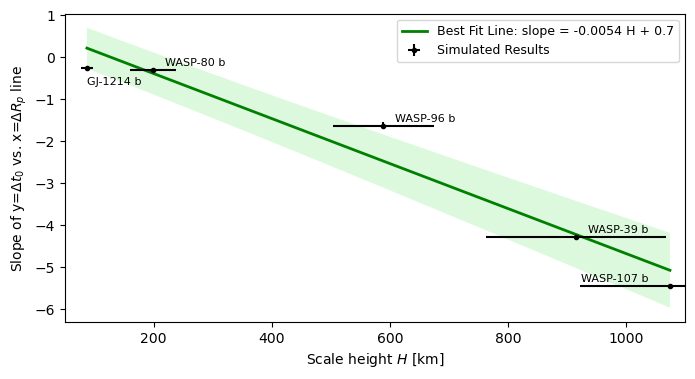

In [129]:
print('Best fit line: slope = m * H + b')
print('Note: slope is for the x = asymmetry, y = time shift plot')
print('m = %.4f +/- %.4f'%(slopeH, slope_errH))
print('b = %.2f +/- %.2f'%(intcptH, intcpt_errH))

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x_fitH, y_fitH, c='green', lw=2, alpha=1, label='Best Fit Line: slope = %.4f H + %.1f'%(slopeH, intcptH))
ax.fill_between(x_fitH, (y_fitH-yerr_fitH), (y_fitH+yerr_fitH), facecolor='lightgreen', alpha=0.3)
ax.errorbar(scaleheights, slopes, xerr=scaleheight_errs, yerr=slope_errs, zorder=10, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    if label=='GJ-1214 b':
        ax.text(scaleheights[i], slopes[i]-0.4, label, fontsize=8)
        #ax.text(scaleheights[i]-60, slopes[i]-0.4, label, fontsize=8)
    elif label == 'WASP-107 b':
        ax.text(scaleheights[i]-150, slopes[i]+0.1, label, fontsize=8)
    else:
        ax.text(scaleheights[i]+20, slopes[i]+0.1, label, fontsize=8)
ax.set(xlabel='Scale height $H$ [km]', ylabel='Slope of y=$\Delta t_0$ vs. x=$\Delta R_p$ line')
ax.set(xlim=(50, 1100))
ax.legend(loc='upper right', markerscale=1, fontsize=9)
#plt.savefig('analysis_figures/slopeH_plot_diffcadencescatter100.png', dpi=350, bbox_inches='tight')
plt.show()

Best fit line: slope = m * H + b
Note: slope is for the x = time, y = asymmetry
m = -0.0014 +/- 0.0004
b = 1.49 +/- 0.25


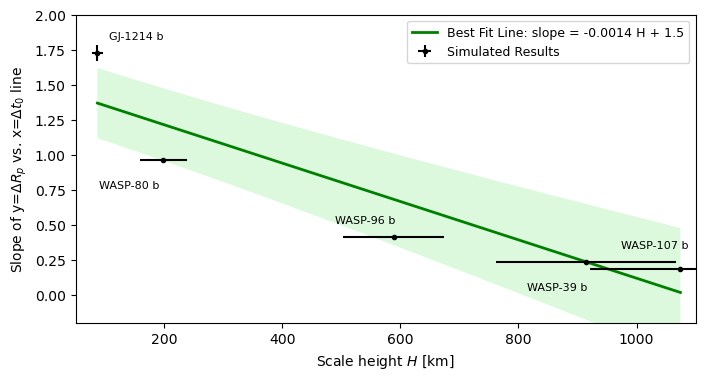

In [130]:
print('Best fit line: slope = m * H + b')
print('Note: slope is for the x = time, y = asymmetry')
print('m = %.4f +/- %.4f'%(slopeH2, slope2_errH))
print('b = %.2f +/- %.2f'%(intcptH2, intcpt2_errH))

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x_fitH2, y_fitH2, c='green', lw=2, alpha=1, label='Best Fit Line: slope = %.4f H + %.1f'%(slopeH2, intcptH2))
ax.fill_between(x_fitH2, (y_fitH2-yerr_fitH2), (y_fitH2+yerr_fitH2), facecolor='lightgreen', alpha=0.3)
ax.errorbar(scaleheights, slopes2, xerr=scaleheight_errs, yerr=slope2_errs, zorder=10, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    if label=='GJ-1214 b':
        ax.text(scaleheights[i]+20, slopes2[i]+0.1, label, fontsize=8)
    elif label == 'WASP-107 b':
        ax.text(scaleheights[i]-100, slopes2[i]+0.15, label, fontsize=8)
    elif label == 'WASP-80 b':
        ax.text(scaleheights[i] - 110, slopes2[i]-0.2, label, fontsize=8)
    elif label=='WASP-39 b':
        ax.text(scaleheights[i] - 100, slopes2[i]-0.2, label, fontsize=8)
    else:
        ax.text(scaleheights[i]-100, slopes2[i]+0.1, label, fontsize=8)
ax.set(xlabel='Scale height $H$ [km]', ylabel='Slope of y=$\Delta R_p$ vs. x=$\Delta t_0$ line')
ax.set(xlim=(50, 1100), ylim=(-.2,2))
ax.legend(loc='upper right', markerscale=1, fontsize=9)
#plt.savefig('analysis_figures/slopeH_plot_friendly_diffcadencescatter100.png', dpi=350, bbox_inches='tight')
plt.show()

Planets with smaller scale heights have shallower slopes in the $\Delta t_0$ vs. $\Delta R_p$ relationship, shown in the previous figure. A shallower slope means that, for a given limb asymmetry size, the current transit time needs to be known to tighter precision. 

## Notes (10/12/22): 
- Regrab MMRs for below with the new results

Notes:
- Error bars for the scale heights are not true. They're set to a stand-in value right now.

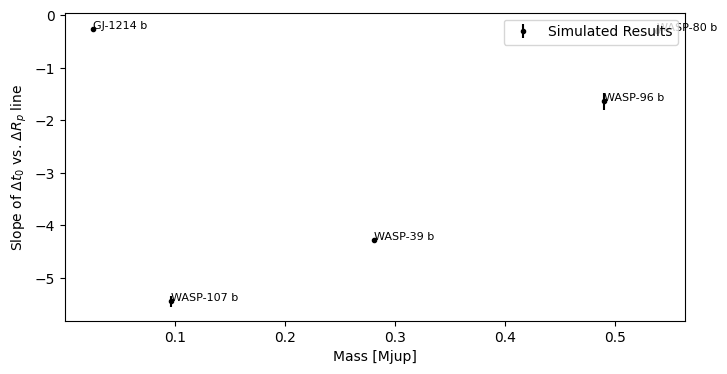

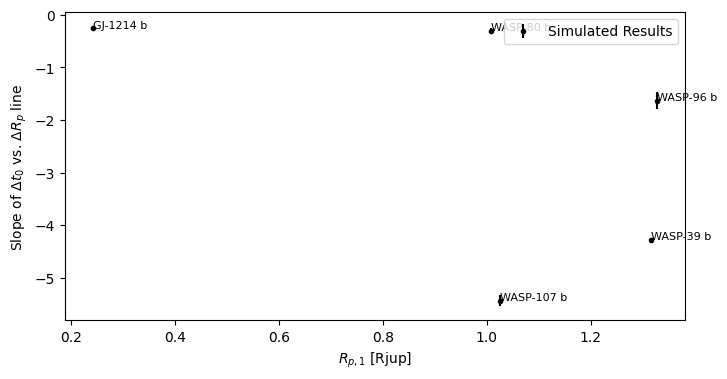

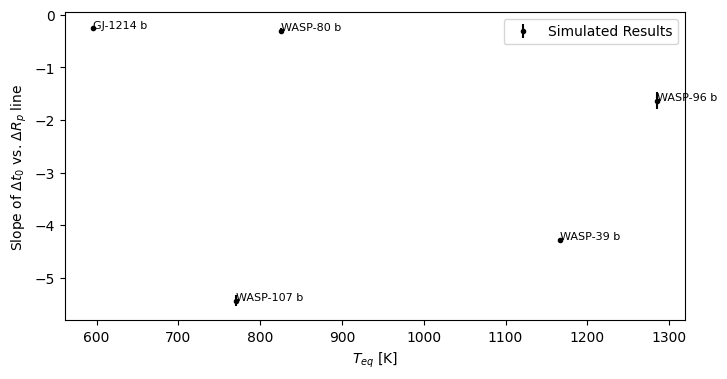

In [17]:
# plotting vs. mass
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(masses, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(masses[i], slopes[i], label, fontsize=8)
ax.set(xlabel='Mass [Mjup]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

# plotting vs. radius
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(radii1, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(radii1[i], slopes[i], label, fontsize=8)
ax.set(xlabel='$R_{p,1}$ [Rjup]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

# plotting vs. Teq
fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(Teqs, slopes, yerr=slope_errs, ls='None', 
            c='black', marker='o', ms=3, label='Simulated Results')
for i, label in enumerate(labels):
    ax.text(Teqs[i], slopes[i], label, fontsize=8)
ax.set(xlabel='$T_{eq}$ [K]', ylabel='Slope of $\Delta t_0$ vs. $\Delta R_p$ line')
ax.legend(loc='upper right')
plt.show()

Remaining factors:
- does changing the observing cadence change these lines?

In [18]:
# gj 1214 b, scen A:
mmr_gj1214 = np.array([15., 21., 15., 12., 21., 22., 29., 58., 54., 68., 71., 79., 112.])
# wasp_96 b:
mmr_w96 = np.array([13., 9., 26., 27., 32., 48., 73., 87., 113., 128., 159., 182., 201.])
#
mmr_w107 = np.array([15., 49., 65., 122., 155., 244., 373., 499., 651., 816., 996., 1222., 1434.])
#
mmr_w39 = np.array([6., 16., 22., 39., 44., 78., 100., 140., 174., 214., 242., 288., 327.])
#
mmr_w80 = np.array([7., 17., 18., 21., 34., 49., 65., 76., 81., 105., 115., 129., 152.])

In [19]:
fasym = np.copy(fasymA)

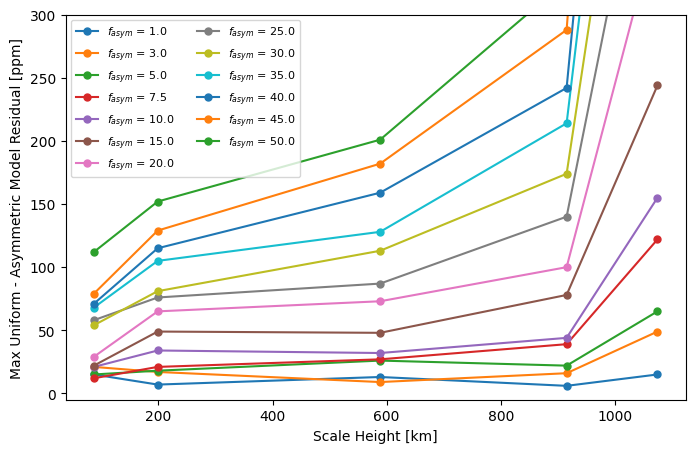

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
for i, f in enumerate(fasym):
#     if (f >= 50):
#         continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(scaleheights, mmr_vals, marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='Max Uniform - Asymmetric Model Residual [ppm]', xlabel='Scale Height [km]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
#plt.savefig('analysis_figures/mmrHplot.png', dpi=400, bbox_inches='tight')
plt.show()

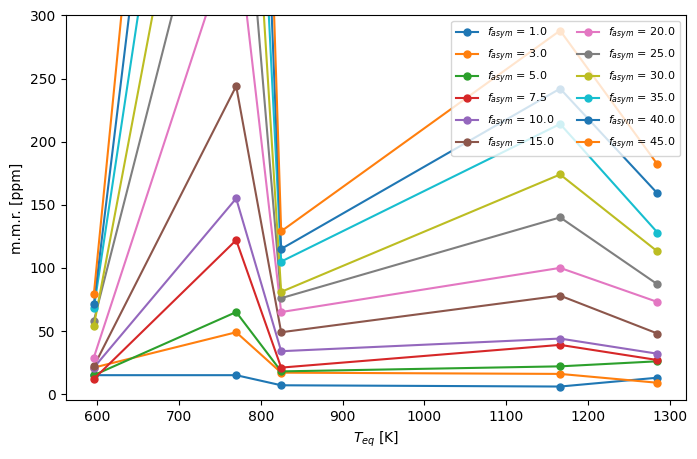

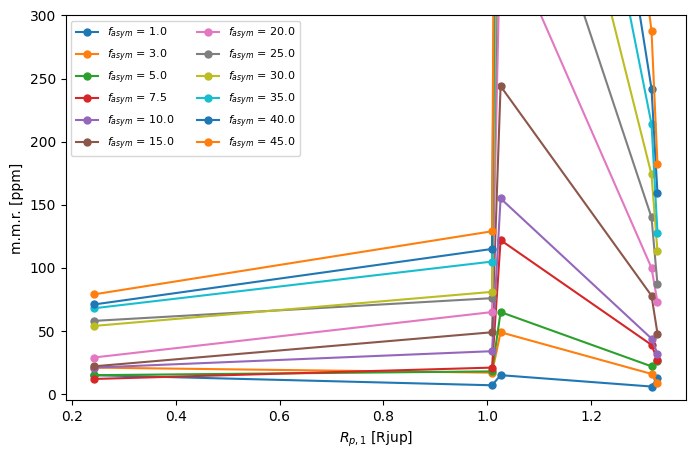

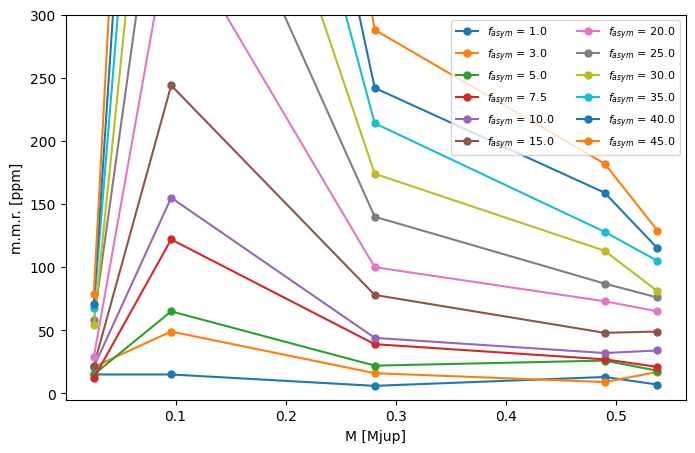

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
Tsort_idxs = np.argsort(Teqs)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(Teqs[Tsort_idxs], mmr_vals[Tsort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='$T_{eq}$ [K]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
Rsort_idxs = np.argsort(radii1)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(radii1[Rsort_idxs], mmr_vals[Rsort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='$R_{p,1}$ [Rjup]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
Msort_idxs = np.argsort(masses)
for i, f in enumerate(fasym):
    if (f >= 50):
        continue
    mmr_vals = np.array([mmr_gj1214[i], mmr_w80[i], mmr_w96[i], mmr_w39[i], mmr_w107[i]]) # in order of inc. scale height
    ax.plot(masses[Msort_idxs], mmr_vals[Msort_idxs], marker='o', ms=5, label='$f_{asym}$ = '+str(f))
ax.set(ylabel='m.m.r. [ppm]', xlabel='M [Mjup]')
ax.set(ylim=(-5, 300))
ax.legend(loc='best', fontsize=8, ncol=2)
plt.show()

In [ ]:
Rp